# SENTIMENTAL AI
# SnT Summer Project, BCS-IITK
## Assignment-2

Reference- https://github.com/07Agarg/Natural-Language-Processing-In-Tensorflow-Course/blob/master/Week%204/NLP_Week4_Exercise_Shakespeare_Question.ipynb 

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()


corpus = data.lower().split("\n")  #conversion to lower case and splitting the data on '\n' to create a corpus of lines
tokenizer.fit_on_texts(corpus) #fit the tokenizer on the corpus
total_words = len(tokenizer.word_index) + 1
print(total_words)

--2022-07-17 11:11:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2022-07-17 11:11:32 (98.4 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

3211


In [3]:
# input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# sequence padding 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  #embedding layer
model.add(Bidirectional(LSTM(150, return_sequences=True)))  #bidirectional LSTM layer
model.add(Dropout(0.2))  #dropout layer
model.add(LSTM(100))  #second LSTM layer
model.add(Dense(total_words/2, activation='relu'))  #dense layer including regularizers
model.add(Dense(total_words, activation='softmax'))  #dense layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
print(model.summary()) #model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [5]:
 history = model.fit(predictors, label, epochs=60, verbose=1)

Epoch 1/60
484/484 [==============================] - 14s 10ms/step - loss: 6.8128 - accuracy: 0.0225
Epoch 2/60
484/484 [==============================] - 5s 9ms/step - loss: 6.4391 - accuracy: 0.0309
Epoch 3/60
484/484 [==============================] - 5s 9ms/step - loss: 6.2375 - accuracy: 0.0350
Epoch 4/60
484/484 [==============================] - 5s 10ms/step - loss: 6.0425 - accuracy: 0.0435
Epoch 5/60
484/484 [==============================] - 5s 10ms/step - loss: 5.7877 - accuracy: 0.0482
Epoch 6/60
484/484 [==============================] - 6s 12ms/step - loss: 5.5375 - accuracy: 0.0578
Epoch 7/60
484/484 [==============================] - 8s 16ms/step - loss: 5.2874 - accuracy: 0.0701
Epoch 8/60
484/484 [==============================] - 5s 10ms/step - loss: 5.0446 - accuracy: 0.0846
Epoch 9/60
484/484 [==============================] - 5s 9ms/step - loss: 4.7799 - accuracy: 0.0982
Epoch 10/60
484/484 [==============================] - 5s 10ms/step - loss: 4.4993 - accuracy

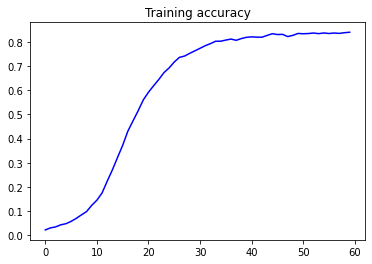

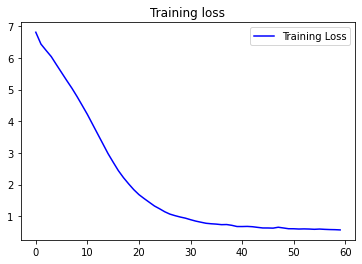

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 15 #number of words to be predicted

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predict_x = model.predict(token_list)
  classes_x = np.argmax(predict_x, axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == classes_x:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)